In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
from pandas import DataFrame, Series

%matplotlib inline

## Importing Data as Dataframe

As our data isn't a typical csv we must make it so that our function deliminates on whitespaces and also define the names because it is missing headers. This then gives us a dataframe that is ready to be cleaned up a bit more.

In [2]:
df_mpg = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", delim_whitespace = True, header = None, names = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"])

In [3]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Replacing and Transforming

We need to replace the ? in the horsepower column into compatible Null values for panda to use them in graphs later. For the same reason we have to convert the numeric values into actual numbers as they are currently strings. The origins need to be replaced with names as right now the numbers don't tell us much.

In [4]:
df_mpg.horsepower.replace({'?': None},inplace = True)

In [5]:
df_mpg.loc[df_mpg["horsepower"].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,None,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,None,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,None,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,None,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,None,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,None,3035.0,20.5,82,1,amc concord dl


In [6]:
df_mpg = df_mpg.apply(pd.to_numeric, errors = 'ignore')

In [7]:
df_mpg.origin.replace({1: 'USA', 2: 'Asia', 3: 'Europe'},inplace = True)

In [8]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


## Creating a Cylinder Distribution "Bar Chart" (Histogram)

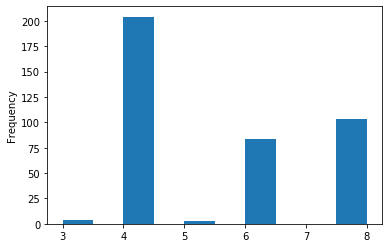

In [9]:
df_mpg.cylinders.plot.hist(x = 'cylinders')

## Creating a Horsepower vs Weight Scatterplot

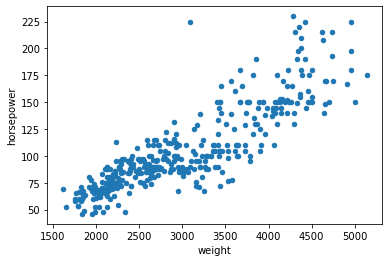

In [10]:
df_mpg.plot.scatter(x = 'weight', y = 'horsepower')

## Analyzing the Relationship Between Year and Origin

I wonder which region will have newer cars or if there will even be a significant difference in the distributions. I will use a categorical scatterplot for this.

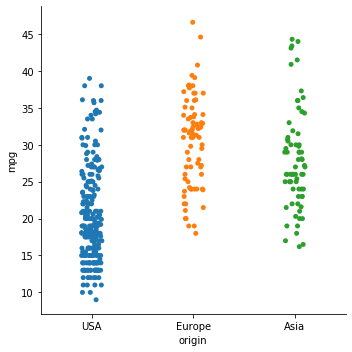

In [11]:
sns.catplot(x="origin", y="mpg", data= df_mpg)

#### Europe and Asia seem to have higher MPG cars than the USA